In [1]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
dirbase = "/content/gdrive/MyDrive/Toxicity Dataset/"

In [4]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# Sklearn modules & classes
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics


# check version number
import imblearn

In [5]:
def DecompChem(chem):
  cod = ['M', 'e', 'P', 'S', 'F', 'm', 'V', 'c', 'A', 'a', 'R', 'o', 't', 'Y', 'O', 'g', 'l', 'y', 'u', 'L', 'i', 'p', 'D', 'U', 'r', 'G', 'T', 'Z', 'N', 'B', 'E', 'X', 'd', 'h', 'C', 's', 'W', 'I', 'n', 'f', 'H', 'b', 'K']
  decomp = []
  for i in range(0,len(cod)):
    aa = chem.count(cod[i])
    decomp.append(aa)
  result = dict(zip(cod, decomp))
  return result

In [6]:
df = pd.read_csv(dirbase+'DatasetToxicityWithDecompChem.csv')
df = df.sample(frac=1).reset_index()

In [7]:
df['label']

0         safe
1         safe
2         safe
3         safe
4         safe
          ... 
185811    safe
185812    safe
185813    safe
185814    safe
185815    safe
Name: label, Length: 185816, dtype: object

In [8]:
#del df['index']
#del df['Unnamed: 0']
#del df['Unnamed: 0.1']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185816 entries, 0 to 185815
Data columns (total 47 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   index       185816 non-null  int64 
 1   Unnamed: 0  185816 non-null  int64 
 2   isosmiles   185816 non-null  object
 3   M           185816 non-null  int64 
 4   e           185816 non-null  int64 
 5   P           185816 non-null  int64 
 6   S           185816 non-null  int64 
 7   F           185816 non-null  int64 
 8   m           185816 non-null  int64 
 9   V           185816 non-null  int64 
 10  c           185816 non-null  int64 
 11  A           185816 non-null  int64 
 12  a           185816 non-null  int64 
 13  R           185816 non-null  int64 
 14  o           185816 non-null  int64 
 15  t           185816 non-null  int64 
 16  Y           185816 non-null  int64 
 17  O           185816 non-null  int64 
 18  g           185816 non-null  int64 
 19  l           185816 non-

In [10]:
from imblearn.over_sampling import SMOTE
from collections import Counter
feature = ['M', 'e', 'P', 'S', 'F', 'm', 'V', 'c', 'A', 'a', 'R', 'o', 't', 'Y', 'O', 'g', 'l', 'y', 'u', 'L', 'i', 'p', 'D', 'U', 'r', 'G', 'T', 'Z', 'N', 'B', 'E', 'X', 'd', 'h', 'C', 's', 'W', 'I', 'n', 'f', 'H', 'b', 'K']
X = df[feature]
y = df['label']
#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)
#counter = Counter(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [11]:
print(len(df[df['label']=='toxic']))
print(len(df[df['label']=='safe']))

16442
169374


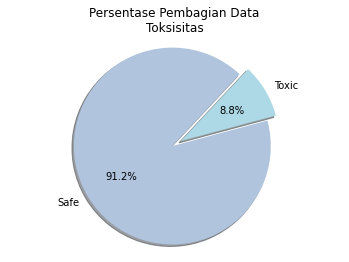

In [12]:
Tasks = [len(df[df['label']=='toxic']),len(df[df['label']=='safe'])]

my_labels = ['Toxic','Safe']
my_colors = ['lightblue','lightsteelblue']
my_explode = (0, 0.1)
plt.pie(Tasks, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Persentase Pembagian Data\nToksisitas')
plt.axis('equal')
plt.show()

In [13]:
#print(counter)

In [14]:
"""
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
"""
X_train_std = X_train
X_test_std = X_test

In [ ]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train_std, y_train)

In [ ]:
# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

In [ ]:
dtest = df[df['label']=='toxic']
dtest[feature]

In [ ]:
testo = svc.predict(dtest[feature])
#print(testo)
benar = 0
salah = 0
for i in range(0,len(dtest[feature])):
  if(testo[i]=='toxic'):
    benar += 1
  else:
    salah += 1

print("benar : ",benar)
print("persentase benar : ",(benar/len(dtest[feature]))*100)
print("salah : ",salah)

In [ ]:
import pickle

# save the model to disk
filename = dirbase+'model-klasifikasi-toksisitas-dasar-001-svm.pkl'
pickle.dump(svc, open(filename, 'wb'))

In [ ]:
import joblib

file = open(dirbase+"model-klasifikasi-toksisitas-dasar-001-svm.pkl","rb")
trained_model = joblib.load(file)
predict = trained_model.predict(dtest[feature])
print(predict)

In [ ]:
dtest.head()